In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
os.getcwd()

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

'C:\\Users\\tchen\\Documents\\Data science\\Notebooks to clean\\First ML project - Multiple Linear Regression - USE THIS'

In [3]:
#Linux
#df = pd.read_csv('/home/tommy/Documents/Data Science/First ML project/US accidents data set/US_Accidents_June20.csv')

#Windows 10
df = pd.read_csv('C:\\Users\\tchen\\Documents\\Data science\\Notebooks\\Predicting US Traffic Accidents\\US accidents data set\\US_Accidents_June20.csv')



In [4]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
#Think about how weather conditions can impact the road


#Columns I don't understand/want clarification about
#TMC?
#Severity? -> How is this judged?
#Start time - end time? -> Based on when the report is on mapquest? ANSWER: Shows time to explain how long it impacted traffic for
#Start lat/start lng/end lat/end long? -> Is this useful at all?
#Distance(mi) -> stretch of road that was affected by the accident
#Number/Street/Country/State/Zipcode/Timezone -> Place accident happend
#Side -> R or L side of the accidentx``
#Airport code -> Does this provide any utility?
#Weather timestamp -> whats this mean?
#Wind chill -> What ranges are there? What does it mean for there to be high/low wind chill
#Humidity -> What does it mean if the humidity is high or low? What even is high or low? -> How can it impact the road?
#Pressure -> How does air pressure (in inches???) matter?
#Wind direction/wind speed -> Does wind direction play a role in the how accidents happen ? -> sstrong tailwind
#Precipitation -> 
#Weather condition -> When do most accidents occur -> This hopefully will be a very useful column
#Amenity -> Means if there is an amenity nearby -> What kindof amneity?
#Crossing -> what kind of crossing
#Giveway -> what is POI? What is a giveway?
#Junction?
#Roundabout -> I want to clarify
#Station -> What kindof station
#Stop? -> Stop sign?
#Taffic calming -> Whats this?
#Turning loop?
#Civil/nautical/astronomical twilight?

In [6]:
#Are there any NAs in the data?
df.info()
#No the data is pretty clean
#Therefore, no need for a data cleaning step.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513740 entries, 0 to 3513739
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [7]:
#What columns are in the data?
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
#Splitting the data between location and conditions of accident
df_information = df[['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lng',
                    'End_Lat', 'End_Lng', 'Distance(mi)', 'Zipcode', 'Country', 'Timezone', 'Airport_Code']]
#df

#Scratch this -> It'll strip a lot of info. I will drop columns based on the question I want to answer

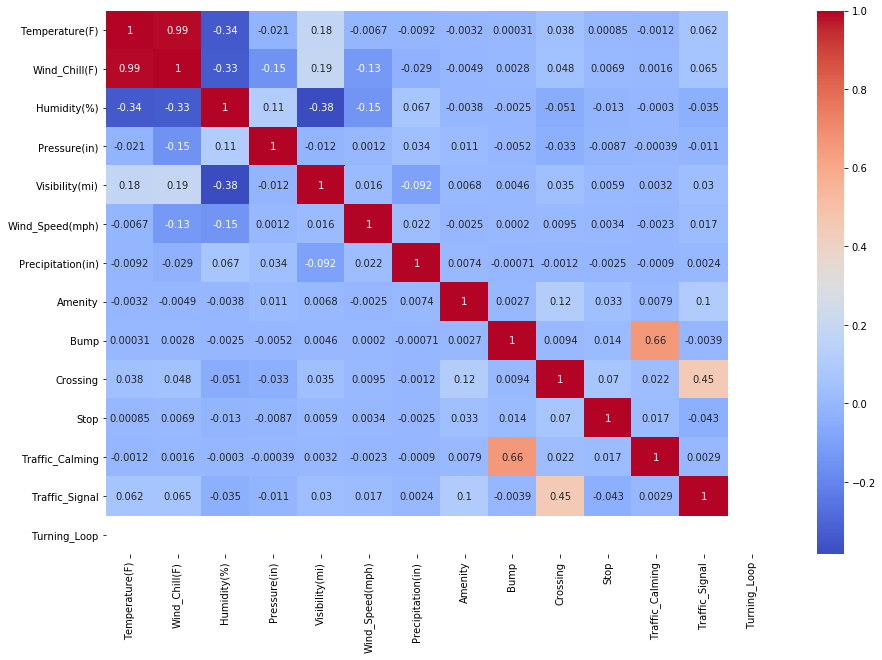

In [9]:
#Heatmap visualization for correlations between conditions of the accidents
df_conditions = df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                   'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                   'Amenity', 'Bump', 'Crossing', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
                   'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight']]
corrMatrix = df_conditions.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm')

In [10]:
#Notes on the heatmap

#Moderate-high correlations
#Humidity + Visibility are negatively correlated
#Traffic calming and a bump are highly correlated
#Traffic signal and crossing are highly correlated 
#that's it. 


##Analsysis:
#-Want the x-axis label to be more horizontal
#Significant relationships - 
#Bump w/ Traffic_calming
#Crossing and Traffic_signal
#

In [11]:
#What states/cities have the highest amount of traffic accidents?
#I could use lat/lngs to create a US map
#Then aggregate dots by what? Zipcode?State?County? -> Which one gives you a decent estimate of the area that's 
#not too wide (i.e whole state) and not too small (i.e street by street)


In [12]:
#Question 2: Overlay a map of the US to the lat and long of these accidents
df_lat_lng = df[['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng']]
df_test = df[['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng']]
#plt.clf()
#plt.scatter(df_lat_lng['Start_Lat',], df_lat_lng['Start_Lng'])

In [13]:
#Not sure if this code below is needed for the map visualization but I want to keep this until I'm sure.
'''

#plt.scatter(df_lat_lng['Start_Lat'], df_lat_lng['Start_Lng'])
import matplotlib.image as mpimg

usa_map = mpimg.imread('/home/tommy/Documents/Data Science/First ML project/USA_continental.png')
df_lat_lng.plot(kind = "scatter", x = "Start_Lat", y = "Start_Lng", colorbar = True)

plt.show()

usa_map = mpimg.imread('/home/tommy/Documents/Data Science/First ML project/USA_continental.png')
plt.figure(figsize = (15,10))

plt.imshow(usa_map, extent=[-130, 130, 20, 90], alpha=0.5)
plt.plot(kind = "scatter", x = "Start_Lat", y = "Start_Lng", colorbar = True, data = df_lat_lng)
plt.show()
'''

'\n\n#plt.scatter(df_lat_lng[\'Start_Lat\'], df_lat_lng[\'Start_Lng\'])\nimport matplotlib.image as mpimg\n\nusa_map = mpimg.imread(\'/home/tommy/Documents/Data Science/First ML project/USA_continental.png\')\ndf_lat_lng.plot(kind = "scatter", x = "Start_Lat", y = "Start_Lng", colorbar = True)\n\nplt.show()\n\nusa_map = mpimg.imread(\'/home/tommy/Documents/Data Science/First ML project/USA_continental.png\')\nplt.figure(figsize = (15,10))\n\nplt.imshow(usa_map, extent=[-130, 130, 20, 90], alpha=0.5)\nplt.plot(kind = "scatter", x = "Start_Lat", y = "Start_Lng", colorbar = True, data = df_lat_lng)\nplt.show()\n'

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
fig = plt.figure(figsize = (15, 15))

#Features of the US map
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle = '-')
ax.add_feature(cfeat.LAKES, alpha = 0.5)
ax.add_feature(cfeat.RIVERS)

ax.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features

ax.scatter(df_lat_lng['Start_Lng'], df_lat_lng['Start_Lat'], transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r' )
fig

In [ ]:

#Summary: This plot is okay for describing places where a lot of traffic accidents happen. There seems to be a lot of accidents on the west and east coats but not so much in the middle of the united states. 
#I wonder if this is due to less population in those areas or what
#Additionally, I wonder if the dataset can be split into monthly data so that it can be more accurate to those areas
#as it is very hard to tell.

#Perhaps bokeh or plotly can allow more interactivitiy to zoom onto a more state by state or county by county region
#Not sure if I want to do that now or not.

#How to go depeer into the map visualization?
#State by state map visualizations
#Year by year map visualization
#Wish this was interactive but not sure if I want to spend time committing to that? Maybe next time
#Let's just try to see if we can go by yr by yr for now

In [ ]:
fig = plt.figure(figsize = (15, 15))

#Features of the US map
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle = '-')
ax.add_feature(cfeat.LAKES, alpha = 0.5)
ax.add_feature(cfeat.RIVERS)

ax.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of featuresfrom datetime import datetime

In [ ]:
#Solution 2
a = pd.to_datetime(df['Start_Time'][1])
df_lat_lng['Start_Time_Test'] = a


In [ ]:
a = pd.to_datetime(df_lat_lng['Start_Time'])
a

In [ ]:
df_lat_lng['Start_Time_2'] = a.values

In [ ]:
from datetime import datetime
datetime.weekday(df_lat_lng['Start_Time_2'][1])

In [ ]:
#Visualization 1 Adjusted by adding per year:
c = []
#Get all the year values for each row
for i in range(len(df_lat_lng['Start_Time'])):
    c.append(df_lat_lng['Start_Time_2'][i].year)

df_lat_lng['Year'] = c

In [ ]:
plt.clf()

In [ ]:
lng_2016 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2016]
lat_2016 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2016]

#Map of accidents in the US in 2016
fig_2016 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2016 = fig_2016.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2016.add_feature(cfeat.LAND)
ax_2016.add_feature(cfeat.OCEAN)
ax_2016.add_feature(cfeat.COASTLINE)
ax_2016.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2016.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2016.add_feature(cfeat.RIVERS)

ax_2016.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2016.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2016.scatter(lng_2016, lat_2016, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:
lng_2017 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2017]
lat_2017 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2017]

#Map of accidents in the US in 2017
fig_2017 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2017 = fig_2017.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2017.add_feature(cfeat.LAND)
ax_2017.add_feature(cfeat.OCEAN)
ax_2017.add_feature(cfeat.COASTLINE)
ax_2017.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2017.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2017.add_feature(cfeat.RIVERS)

ax_2017.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2017.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2017.scatter(lng_2017, lat_2017, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:

lng_2018 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2018]
lat_2018 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2018]

#Map of accidents in the US in 2018
fig_2018 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2018 = fig_2018.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2018.add_feature(cfeat.LAND)
ax_2018.add_feature(cfeat.OCEAN)
ax_2018.add_feature(cfeat.COASTLINE)
ax_2018.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2018.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2018.add_feature(cfeat.RIVERS)

ax_2018.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2018.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2018.scatter(lng_2018, lat_2018, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:

lng_2019 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2019]
lat_2019 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2019]

#Map of accidents in the US in 2019
fig_2019 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2019 = fig_2019.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2019.add_feature(cfeat.LAND)
ax_2019.add_feature(cfeat.OCEAN)
ax_2019.add_feature(cfeat.COASTLINE)
ax_2019.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2019.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2019.add_feature(cfeat.RIVERS)

ax_2019.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2019.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2019.scatter(lng_2019, lat_2019, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:

lng_2020 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2020]
lat_2020 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2020]

#Map of accidents in the US in 202020
fig_2020 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2020 = fig_2020.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2020.add_feature(cfeat.LAND)
ax_2020.add_feature(cfeat.OCEAN)
ax_2020.add_feature(cfeat.COASTLINE)
ax_2020.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2020.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2020.add_feature(cfeat.RIVERS)

ax_2020.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2020.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2020.scatter(lng_2020, lat_2020, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:
#Double checking columns I have leftover
df.columns

In [ ]:
#Double checking info of data frame
df.info()    

In [ ]:
#Calcuating sum of each the quantitative varaibles
a = np.zeros(13)
a.shape

for i in range(32,45):
    b = i-32
    column_sum = np.sum(df.iloc[:,i])
    a[b] = column_sum

In [ ]:
#Formatting to be 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Categorical columns to analyze
list_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
               'Roundabout', 'Station', 'Stop','Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

In [ ]:
zipped = list(zip(list_columns,a))
zipped

In [ ]:
df_poi = pd.DataFrame(zipped, columns = ['POI', 'Count'])

In [ ]:
plt.bar(df_poi['POI'], df_poi['Count'], alpha = 0.5)
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Total amount of accidents for each POI')

In [ ]:

from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Implementing a word cloud
a = str(df['Description'][0]).split()

In [ ]:
a[5].lower()

In [ ]:
stopwords = set(STOPWORDS)
comment_words = ''
df_str = str(df['Description'])

for i in range(len(df_str)):
    tokens = df_str.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens) + " "
    

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                     stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [16]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#Implmenting Multiple linear regression from scratch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14,7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
class LinearRegression:
    '''
    A class that implements multiple linear regression model with gradient descent
    '''
    
    def __init__(self, learning_rate = 0.01, n_iterations = 10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method used to calculate loss at each iteration of gradient descent
        :param y  - array, true values
        :param y_hat - array, predicted values
        :return: float
        '''
        
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) **2
        return error/len(y)
    
    def fit(self, X,y):
        '''
        Used to calculate the coefficient of the linear regression model
        
        :param X: array, features
        :param y: array, true values
        :return None
        
        '''
        
        #Step 1 to fitting. Initialize the initial weights and biases to zeros
        self.weights = np.zeros(X.shape[1]) #Array of zeros in the with the same length as X
        
        self.bias = 0 #Intercept weight (β0)
        
        #Step 2: Performing gradient descent
        
        for i in range(self.n_iterations):
            #Line equaiton
            y_hat = np.dot(X, self.weights) + self.bias #Calculate the linear regression line            
            loss = self._mean_squared_error(y, y_hat)  #Calculate the error associated with that line
            self.loss.append(loss)#Record the loss value
            
            #Calculate derivatives
            partial_w = (1/ X.shape[0])*(2*np.dot(X.T, (y_hat - y))) #Partial derivate wrt w
            partial_d = (1/X.shape[0])*(2*np.sum(y_hat-y)) #Partial derivate wrt d 
            
            #Update the coefficients 
            self.weights = self.weights - (self.learning_rate*partial_w)
            self.bias = self.weights - (self.learning_rate * partial_d)
            
            
    
    
    def predict(self, X):
        '''
        Makes prediction using the line equation
        
        :param X: array, features
        :return: array, predictions
        '''
        
        return np.dot(X, self.weights)+self.bias            

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = trian_test_split(X,y, test_size = 0.2, random_state = 15 ) #Split data up into a training set and test set

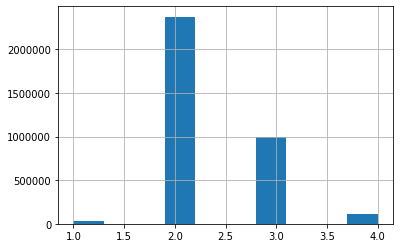

In [18]:
df['Severity'].hist()
#unbalanced class

In [19]:
df['Severity'].describe()

count    3.513740e+06
mean     2.339935e+00
std      5.522103e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: Severity, dtype: float64